# Diabetes Prediction Model to diagnostically predict whether a patient has diabetes or not based on certain diagnostic measurements

## Importing required libraries

In [100]:
# Importing required libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [101]:
# Loading the dataset
df=pd.read_csv('diabetes.csv')

In [102]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [103]:
# Replacing null values with mean values
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI']=df['BMI'].replace(0,df['Glucose'].mean())

In [104]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [106]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,33.735414,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,12.641403,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.825000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,121.681605,2.420000,81.000000,1.000000


## Checking for missing values

In [107]:
# To check for missing values
df.isnull().values.any()

False

In [108]:
# To check for missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Correlation matrix

In [109]:
# Correlation matrix
correlation=df.corr()
print(correlation)

                          Pregnancies   Glucose  BloodPressure  SkinThickness   
Pregnancies                  1.000000  0.127964       0.208984       0.013376  \
Glucose                      0.127964  1.000000       0.219666       0.160766   
BloodPressure                0.208984  0.219666       1.000000       0.134155   
SkinThickness                0.013376  0.160766       0.134155       1.000000   
Insulin                     -0.018082  0.396597       0.010926       0.240361   
BMI                          0.013652  0.067695       0.157487       0.231961   
DiabetesPedigreeFunction    -0.033523  0.137106       0.000371       0.154961   
Age                          0.544341  0.266600       0.326740       0.026423   
Outcome                      0.221898  0.492908       0.162986       0.175026   

                           Insulin       BMI  DiabetesPedigreeFunction   
Pregnancies              -0.018082  0.013652                 -0.033523  \
Glucose                   0.396597  0.067

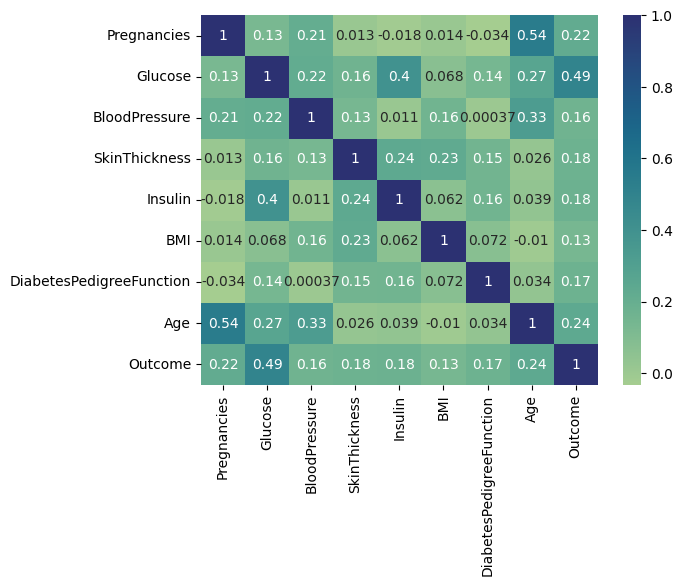

In [110]:
# Visualizing the correlation using heatmap
sns.heatmap(correlation,annot=True,cmap="crest")
plt.show()

### Insights : From this heatmap we can analyze that as the various parameters such as pregnancies,glucose,BP,Skin thickness,insulin,BMI,DPF, age increases the probability of being diabetic also increases 

## Analyzing the data using various visuals

In [111]:
# Replacing outcome values 1 and 0 with 'yes' and 'no' respectively
df1= df.replace({'Outcome': {1: 'Yes',  0: 'No'}})

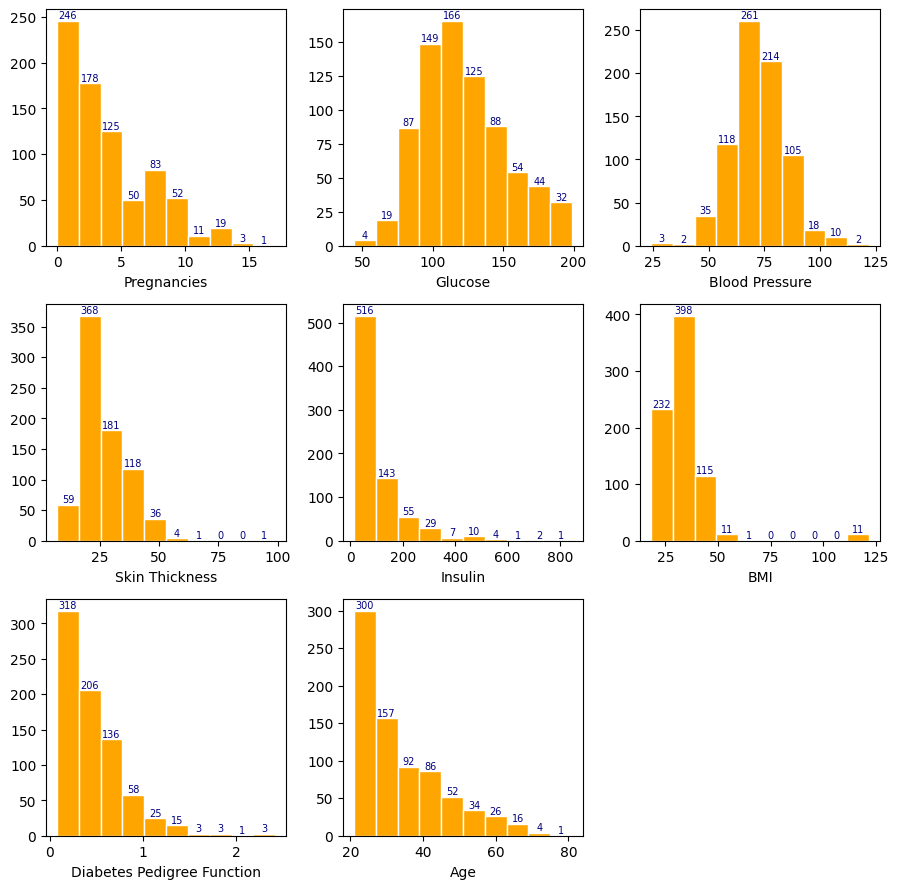

In [112]:
# Plotting histograms
plt.figure(figsize=(9,9))
plt.subplot(3,3,1)
values, bins, bars = plt.hist(df1['Pregnancies'], edgecolor='white',color='orange')
plt.bar_label(bars, fontsize=7, color='navy')
plt.xlabel('Pregnancies')
plt.subplot(3,3,2)
values, bins, bars = plt.hist(df1['Glucose'], edgecolor='white',color='orange')
plt.bar_label(bars, fontsize=7, color='navy')
plt.xlabel('Glucose')
plt.subplot(3,3,3)
values, bins, bars = plt.hist(df1['BloodPressure'], edgecolor='white',color='orange')
plt.bar_label(bars, fontsize=7, color='navy')
plt.xlabel('Blood Pressure')
plt.subplot(3,3,4)
values, bins, bars = plt.hist(df1['SkinThickness'], edgecolor='white',color='orange')
plt.bar_label(bars, fontsize=7, color='navy')
plt.xlabel('Skin Thickness')
plt.subplot(3,3,5)
values, bins, bars = plt.hist(df1['Insulin'], edgecolor='white',color='orange')
plt.bar_label(bars, fontsize=7, color='navy')
plt.xlabel('Insulin')
plt.subplot(3,3,6)
values, bins, bars = plt.hist(df1['BMI'], edgecolor='white',color='orange')
plt.bar_label(bars, fontsize=7, color='navy')
plt.xlabel('BMI')
plt.subplot(3,3,7)
values, bins, bars = plt.hist(df1['DiabetesPedigreeFunction'], edgecolor='white',color='orange')
plt.bar_label(bars, fontsize=7, color='navy')
plt.xlabel('Diabetes Pedigree Function')
plt.subplot(3,3,8)
values, bins, bars = plt.hist(df1['Age'], edgecolor='white',color='orange')
plt.bar_label(bars, fontsize=7, color='navy')
plt.xlabel('Age')
plt.tight_layout()

### Insights : Here we can analyze that mostly females the dataset are having what diagnostic measurements

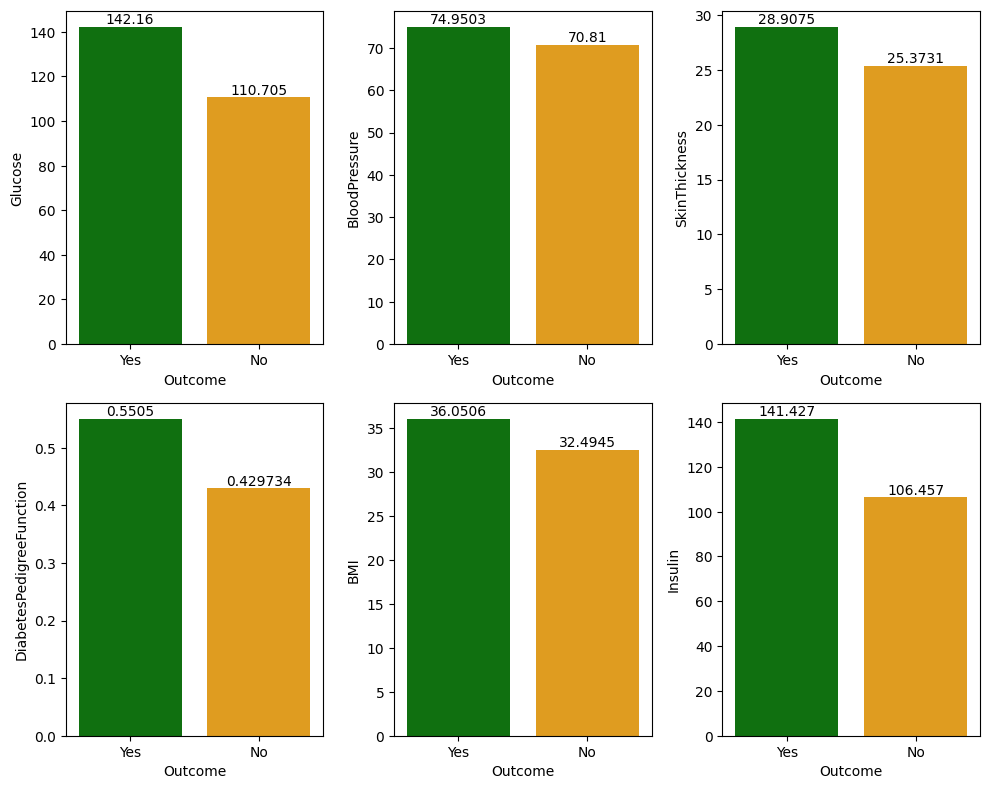

In [113]:
# Plotting barplots
plt.figure(figsize=(10,8))
plt.subplot(2,3,1)
f1=sns.barplot(x="Outcome", y="Glucose", data=df1,hue="Outcome",palette=["green","orange"],errorbar=None)
for container in f1.containers:
    f1.bar_label(container)
plt.subplot(2,3,2)
f2=sns.barplot(x="Outcome", y="BloodPressure", data=df1,hue="Outcome",palette=["green","orange"],errorbar=None)
for container in f2.containers:
    f2.bar_label(container)
plt.subplot(2,3,3)
f3=sns.barplot(x="Outcome", y="SkinThickness", data=df1,hue="Outcome",palette=["green","orange"],errorbar=None)
for container in f3.containers:
    f3.bar_label(container)
plt.subplot(2,3,4)
f4=sns.barplot(x="Outcome", y="DiabetesPedigreeFunction", data=df1,hue="Outcome",palette=["green","orange"],errorbar=None)
for container in f4.containers:
    f4.bar_label(container)
plt.subplot(2,3,5)
f5=sns.barplot(x="Outcome", y="BMI", data=df1,hue="Outcome",palette=["green","orange"],errorbar=None)
for container in f5.containers:
    f5.bar_label(container)
plt.subplot(2,3,6)
f6=sns.barplot(x="Outcome", y="Insulin", data=df1,hue="Outcome",palette=["green","orange"],errorbar=None)
for container in f6.containers:
    f6.bar_label(container)
plt.tight_layout()

### Insights : Females with higher glucose, blood pressure, skin thickness, diabetes pedigree function, BMI or Insulin are more prone to diabetes

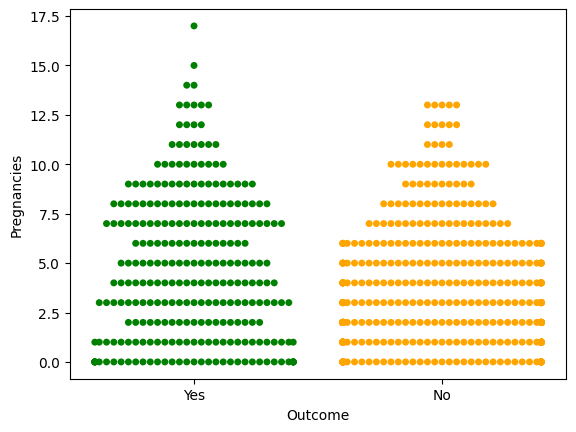

In [114]:
# Plotting swarmplot
sns.swarmplot(y="Pregnancies",x="Outcome",data=df1,palette=["green", "orange"])
plt.show()

### Insights : Mostly females with either no or upto 1 pregnancy are more prone to diabetes 

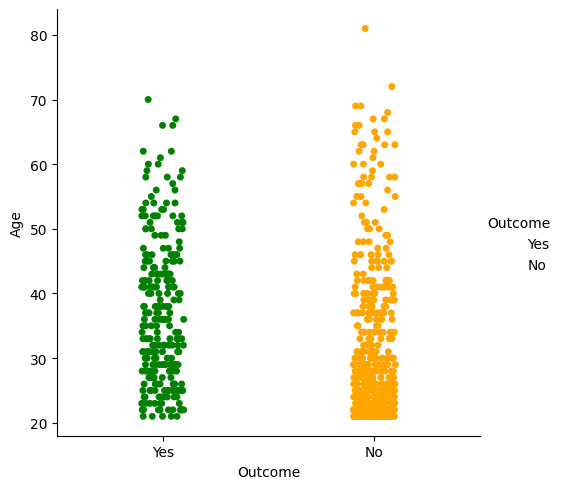

In [115]:
#Plotting catplot
sns.catplot(y="Age",x="Outcome",data=df1,palette=["green", "orange"])
plt.show()

### Insights : Females with age in the range of 20 to 50 are more prone to diabetes. But mostly females with age in the range of 20 to 30 are less likely to be diabetic

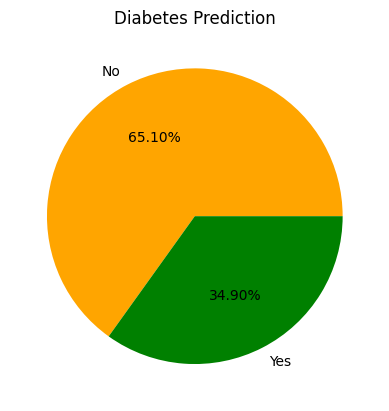

In [116]:
# Plotting pie chart
plt.pie(df1['Outcome'].value_counts(),labels=('No','Yes'),autopct='%1.2f%%',colors=("orange","green"))
plt.title('Diabetes Prediction')
plt.show()

## Training the model with the help of Train Test Split

In [117]:
# Importing scikit-learn library
from sklearn.model_selection import train_test_split

In [118]:
# Train Test Split
x=df.drop(['Outcome'],axis=1)
y=df['Outcome']

In [119]:
# Feature data
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [120]:
# Target data
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [121]:
# Splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [122]:
# Model
from sklearn.linear_model import LogisticRegression

In [123]:
# Training the model
lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [124]:
# Accuracy of the model
lr_accu=lr_model.score(x_test,y_test)*100
print("Accuracy : {}".format(lr_accu))

Accuracy : 75.32467532467533


In [125]:
# Getting the columns
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


## Creating a GUI for the model

In [126]:
# Creating a function for gradio to predict the outcome (1:yes,0:no) for diabetes
def diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age):
    x_new=np.array([Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age])
    prediction = lr_model.predict(x_new.reshape(1, -1))
    if prediction[0]==1:
        return "YES"
    else:
        return "NO"
    

In [127]:
# Importing library to create a GUI
import gradio as gr

In [128]:
# Creating an interface
app = gr.Interface(fn=diabetes, inputs=["number","number","number","number","number","number","number","number"], outputs="text",title="Diabetes Prediction Model",allow_flagging="never",description="Welcome!!! This is a diabetes prediction model. The objective of this model is to diagnostically predict whether a patient has diabetes or not based on certain diagnostic measurements. Kindly enter the details below to check : ")

In [129]:
# Launch the web app
app.launch(share=True)

Running on local URL:  http://127.0.0.1:7862
Running on public URL: https://d39c463354c814ae8d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
